In [1]:
include("interpolation.jl")

spinterp

# Полиномиальная интерполяция

```{index} интерполяция; полиномиальная
```
:::{proof:definition} Полиномиальная интерполяция
**Полиномиальная интерполяция** по точкам $(t_1, y_1), (t_2,y_2), ..., (t_n, y_n)$, где все $t_i$ различны, заключается в построении полинома $p(x)$ степени не выше $n$, проходящего через все данные точки, т.е.

```{math}
:label: polyinterpcond
p(t_i)=y_i,\quad i=1, ..., n.
```
:::

Такой полином можно получить, рассматривая задачу интерполяции как линейную систему. Однако, существуют и другие способы, например, построение полинома в форме Лагранжа или Ньютона.

Полинома степени не выше $n$ имеет вид

```{math}
:label: polyinterppoly
p(x) = c_1 + c_2 x + c_3 x^2 + ... + c_n x^{n-1}.
```

Воспользуемся условием {eq}`polyinterpcond` и получим систему на коэффициенты $c_i$

```{math}
\begin{align*}
c_1 + c_2 t_1 + c_3 t^2_1 + ... + c_n t^{n-1}_1 &= y_1\\
c_1 + c_2 t_2 + c_3 t^2_2 + ... + c_n t^{n-1}_2 &= y_2\\
&\vdots\\
c_1 + c_2 t_i + c_3 t^2_i + ... + c_n t^{n-1}_i &= y_i\\
&\vdots\\
c_1 + c_2 t_n + c_3 t^2_n + ... + c_n t^{n-1}_n &= y_n\\
\end{align*}
```

Данная система записывается в виде $\mathbf{V}\mathbf{c}=\mathbf{y}$

```{math}
:label: polyinterpsys
\begin{bmatrix}
1 & t_1 & ... & t_1^{n-2} & t_1^{n-1} \\
1 & t_2 & ... & t_2^{n-2} & t_2^{n-1} \\
\vdots & \vdots & & \vdots & \vdots   \\
1 & t_{n-1} & ... & t_{n-1}^{n-2} & t_{n-1}^{n-1}
\end{bmatrix}
\begin{bmatrix}
c_1 \\c_2 \\ \vdots \\ c_n
\end{bmatrix}
=
\begin{bmatrix}
y_1 \\ y_2 \\ \vdots \\ y_n
\end{bmatrix}.
```

```{index} матрица; Вандермонда
```
Матрица $\mathbf{V}$ называется [матрицей Вандермонда](https://en.wikipedia.org/wiki/Vandermonde_matrix).

Итак, для решения задачи полиномиальной интерполяции, необходимо

1. Составить систему {eq}`polyinterpsys`;
2. Решить систему {eq}`polyinterpsys`, таким образом, получив коэффициенты $c_i$;
3. Решением же задачи будет функция {eq}`polyinterppoly`. 

## Реализация

(function-polyinterp)=
:::{proof:function} polyinterp
**Полиномиальная интерполяция**
```julia
"Возвращает полиномиальный интерполянт, проходящий через точки (`t[i]`, `y[i]`)."
function polyinterp(t, y)
    V = vandermonde(t)
    c = V \ y
    return x -> horner(c, x)
end
```
:::
(function-vandermonde)=
:::{proof:function} vandermonde
```julia
"Возвращает матрицу Вандермонда."
function vandermonde(x)
    V = zeros(eltype(x), size(x, 1), size(x, 1))
    for j in 1:size(V, 2)
        V[:, j] .= x .^ (j-1)
    end
    return V
end
```
:::
(function-horner)=
:::{proof:function} horner
```julia
"Вычисляет полином `c[1] + c[2]*x + c[3]*x^2 + ...` алгоритмом Горнера."
function horner(c, x)
    ans = last(c)
    for i in lastindex(c)-1:-1:1
        ans = (ans * x) + c[i]
    end
    return ans
end
```
:::

{numref}`Функция {number} <function-polyinterp>` `polyinterp` вычисляет коэффициенты `c` полинома  {eq}`polyinterppoly`, а затем создаёт и возвращает анонимную функцию, которая при вызове вычисляет значение полинома {eq}`polyinterppoly` с помощью {numref}`Функции {number} <function-horner>` `horner`. Поскольку здесь реализуется [замыкание](https://en.wikipedia.org/wiki/Closure_(computer_programming)), то вектор коэффициентов вычисляется только один раз, при вызове `polyinterp`.

{numref}`Функция {number} <function-vandermonde>` `vandermonde` строит матрицу Вандермонда для системы {eq}`polyinterpsys`. В теле её цикла вектор `x` поэлементно возводится в степень, а затем присваивается в `j`-ый столбец матрицы `V`.

Наконец, {numref}`Функция {number} <function-horner>` `horner` вычисляет полином [методом Горнера](https://ru.wikipedia.org/wiki/%D0%A1%D1%85%D0%B5%D0%BC%D0%B0_%D0%93%D0%BE%D1%80%D0%BD%D0%B5%D1%80%D0%B0)


```{proof:demo} Полиномиальная интерполяция
```

```{raw} html
<div class="demo">
```

Для примера мы посмотрим на полиномиальную интерполяцию известной нам функции `foo(x)`, в реальных же данных `foo(x)` неизвестна.

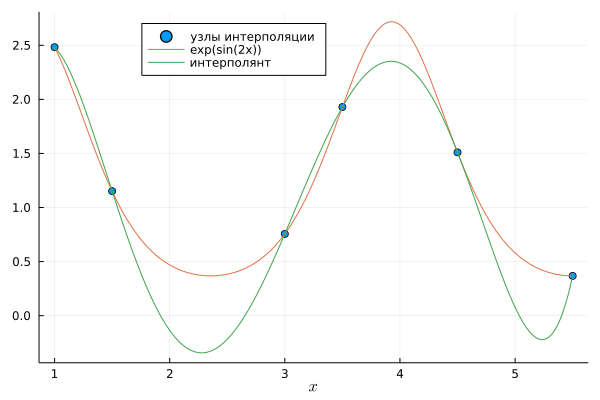

In [2]:
foo(x) = exp(sin(2x))
ts = [1.0, 1.5, 3.0, 3.5, 4.5, 5.5]
ys = foo.(ts)

interpolant = polyinterp(ts, ys)

scatter(ts, ys; label="узлы интерполяции", legend=:top, xlabel=L"x")
xs = range(first(ts), last(ts); length=200)
plot!(xs, foo.(xs); label="exp(sin(2x))")
plot!(xs, interpolant.(xs); label="интерполянт")

В целом выглядит неплохо, однако стоит добавить одну точку $t_i = 4.1$ во входные данные, и интерполянт сильно поменяется.

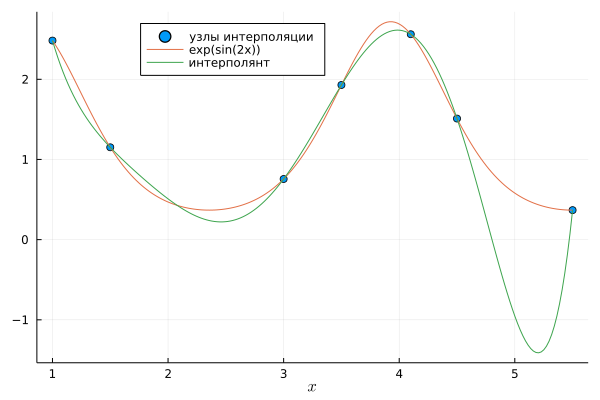

In [3]:
foo(x) = exp(sin(2x))
ts = [1.0, 1.5, 3.0, 3.5, 4.1, 4.5, 5.5]
ys = foo.(ts)

interpolant = polyinterp(ts, ys)

scatter(ts, ys; label="узлы интерполяции", legend=:top, xlabel=L"x")
xs = range(first(ts), last(ts); length=200)
plot!(xs, foo.(xs); label="exp(sin(2x))")
plot!(xs, interpolant.(xs); label="интерполянт")

```{raw} html
</div>
```

```{proof:observation}
Сильная зависимость от расположения точек требует дополнительных проверок, иначе можно с большой ошибкой задать табличные данные. Ошибку интерполяции стоит оценивать хотя бы на глаз.

Так, можно заложить в модель не только крупные численные ошибки, но и *качественные*, например, нефизическое поведение.
```

(poly_equalspaced)=
## Случай равноотстоящих точек

```{proof:proposition}
Полиномиальная интерполяция **плохо обусловлена** в случае равноотстоящих узлов интерполяции.
```

```{proof:demo}
```

```{raw} html
<div class="demo">
```

Возьмём функцию из предыдущего примера, но добавим в неё небольшой шум. В реальных данных этот шум вносится погрешностями измерений.

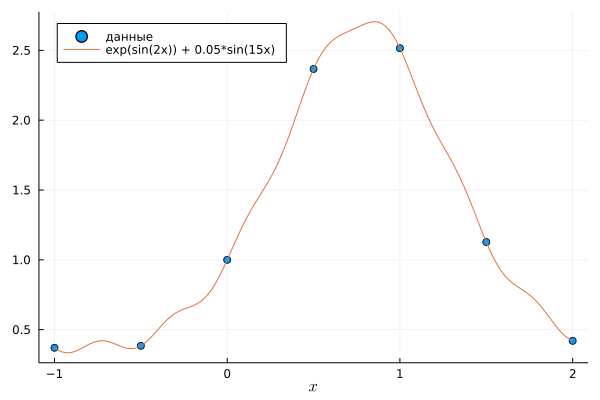

In [4]:
foo(x) = exp(sin(2x)) + 0.05*sin(15x)
ts = range(-1, 2; length=7)
ys = foo.(ts)

scatter(ts, ys; label="данные", legend=:topleft, xlabel=L"x")
xs = range(first(ts), last(ts); length=200)
plot!(xs, foo.(xs); label="exp(sin(2x)) + 0.05*sin(15x)")

Посмотрим на интерполянт.

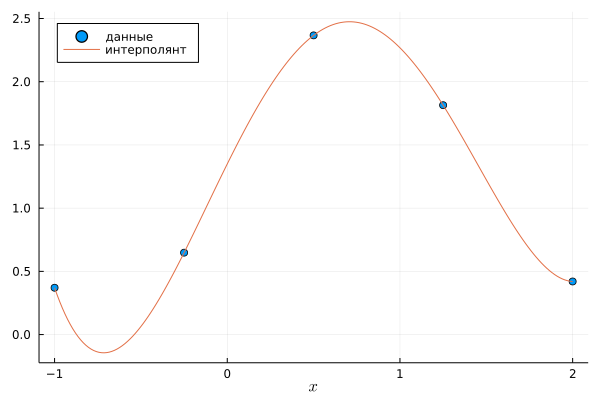

In [5]:
foo(x) = exp(sin(2x)) + 0.05*sin(15x)
ts = range(-1, 2; length=5)
ys = foo.(ts)

interpolant = polyinterp(ts, ys)

scatter(ts, ys; label="данные", legend=:topleft, xlabel=L"x")
xs = range(first(ts), last(ts); length=200)
plot!(xs, interpolant.(xs); label="интерполянт")

Что будет, если взять 15 точек? Данные с шумом не сильно изменились: это всё тот же "холм".

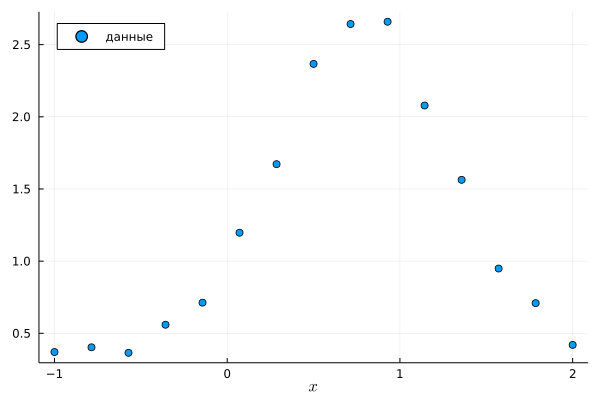

In [6]:
foo(x) = exp(sin(2x)) + 0.05*sin(15x)
ts = range(-1, 2; length=15)
ys = foo.(ts)

scatter(ts, ys; label="данные", legend=:topleft, xlabel=L"x")

Но интерполянт выглядит так.

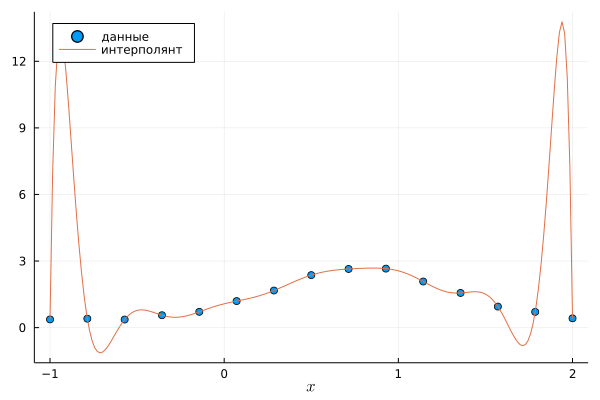

In [7]:
foo(x) = exp(sin(2x)) + 0.05*sin(15x)
ts = range(-1, 2; length=15)
ys = foo.(ts)

interpolant = polyinterp(ts, ys)

scatter(ts, ys; label="данные", legend=:topleft, xlabel=L"x")
xs = range(first(ts), last(ts); length=200)
plot!(xs, interpolant.(xs); label="интерполянт")

```{raw} html
</div>
```

```{proof:observation}
Таким образом, если полиномиальная интерполяция и используется на практике, то применяются полиномы не больших степеней, при этом узлы интерполяции тщательно выбираются, если есть возможность.
```